In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

ここでは,物理学実験1のデータを用いてPythonを使ったデータ解析を行ってみる
.

# 課題3 

In [43]:
rowdata= pd.read_csv('PEP1-3-4.csv', usecols=[1, 3])

In [44]:
print(rowdata)

                 13:00      Unnamed: 3
0                  NaN             NaN
1           559.615084             NaN
2       -0.04926826477             NaN
3   0.0000001952758655             NaN
4                  NaN             NaN
5              液面高さ[m]         ダイオード高さ
6                  0.3             NaN
7                 0.22           0.055
8                  NaN             NaN
9                  NaN             NaN
10            絶対圧[MPa]             NaN
11                 0.1           77.35
12                0.09     76.67078024
13                0.08     75.67475021
14                0.07     74.72417061
15                0.06     73.50224991
16                0.05     72.05441628
17                0.04     70.42608149
18                0.03     68.48178939
19                0.02     65.49893192
20                0.01      559.615084
21                   0         #VALUE!
22                0.01     62.92419682
23                 NaN             NaN
24                 NaN   

In [45]:
data=rowdata.values
print(data)

[[nan nan]
 ['559.615084' nan]
 ['-0.04926826477' nan]
 ['0.0000001952758655' nan]
 [nan nan]
 ['液面高さ[m]' 'ダイオード高さ']
 ['0.3' nan]
 ['0.22' '0.055']
 [nan nan]
 [nan nan]
 ['絶対圧[MPa]' nan]
 ['0.1' '77.35']
 ['0.09' '76.67078024']
 ['0.08' '75.67475021']
 ['0.07' '74.72417061']
 ['0.06' '73.50224991']
 ['0.05' '72.05441628']
 ['0.04' '70.42608149']
 ['0.03' '68.48178939']
 ['0.02' '65.49893192']
 ['0.01' '559.615084']
 ['0' '#VALUE!']
 ['0.01' '62.92419682']
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 ['温度(再掲)' '1/T']
 ['77.35' '0.01292824822']
 ['76.67078024' '0.01304277845']
 ['75.67475021' '0.01321444732']
 ['74.72417061' '0.01338255068']
 ['73.50224991' '0.01360502571']
 ['72.05441628' '0.01387839985']
 ['70.42608149' '0.01419928496']
 ['68.48178939' '0.01460242217']
 ['65.49893192' '0.01526742453']
 ['559.615084' '0.001786942541']
 ['#VALUE!' '#VALUE!']
 [nan nan]
 ['絶対圧0のデータはおそらくとれない' nan]
 ['↓データ数に注意' nan]
 ['-688.3044978' nan]
 ['6.565626187' nan]
 [nan nan]
 ['710.25

In [46]:
print(data[11][0])

0.1


In [47]:
datax=[]
datay=[]
for i in range(11,20):
    datax.append(float(data[i][1]))
    datay.append(float(data[i][0]))


In [48]:
print(datax,datay)

[77.35, 76.67078024, 75.67475021, 74.72417061, 73.50224991, 72.05441628, 70.42608149, 68.48178939, 65.49893192] [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02]


In [49]:
datax=np.array(datax)
datay=np.array(datay)

In [50]:
print(datax,datay)

[77.35       76.67078024 75.67475021 74.72417061 73.50224991 72.05441628
 70.42608149 68.48178939 65.49893192] [0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03 0.02]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


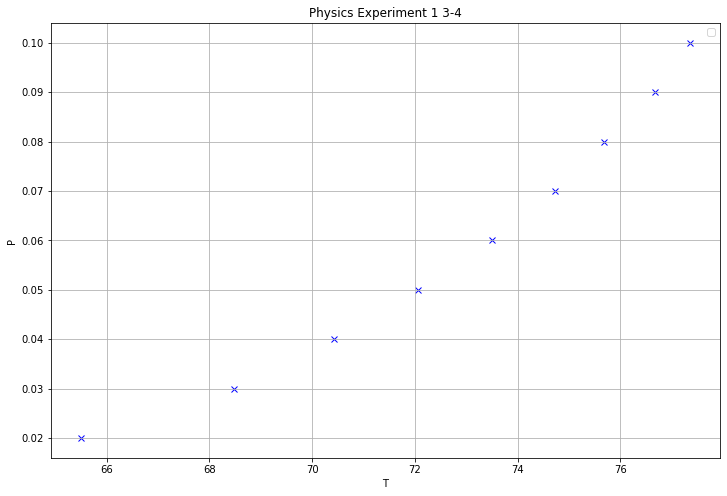

In [51]:
plt.figure(figsize=(12,8),facecolor="white",)
plt.title("Physics Experiment 1 3-4")
plt.scatter(datax,datay,marker="x",color="blue",linewidth=1.0,label="")
#plt.plot(datax,datay,color="red",linewidth=1.0,label="")

plt.legend()
plt.xlabel("T")
plt.ylabel("P")
plt.grid()
#plt.xlim()

In [56]:
def Exponential_fit(x,a,b):
    return b*np.exp(a/x)

#curve fittingの実施
param, cov = curve_fit(Exponential_fit, datax, datay)

In [65]:
print(param)
print(cov)

[-712.00207874  978.10700275]
[[  140.33481669 -1825.57238196]
 [-1825.57238196 23773.73737748]]


In [58]:
sample_x=np.linspace(65,78,1000)
y=param[1]*np.exp(param[0]/sample_x)

In [62]:
mtly=710*np.exp(-688/sample_x)

(65.0, 78.0)

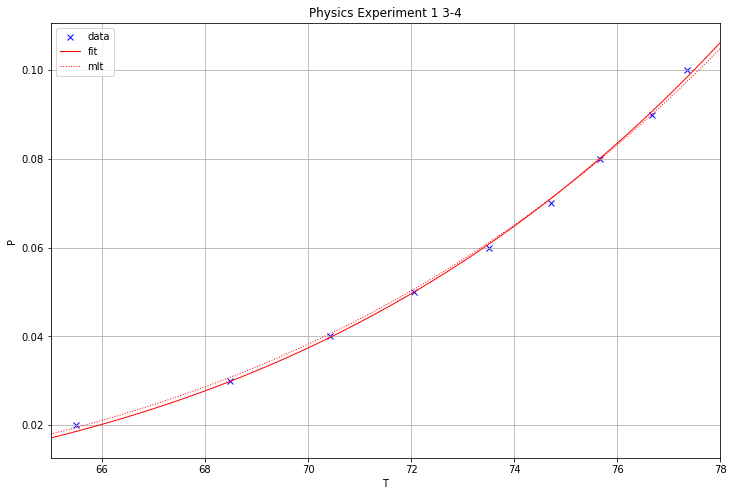

In [67]:
plt.figure(figsize=(12,8),facecolor="white",)
plt.title("Physics Experiment 1 3-4")
plt.scatter(datax,datay,marker="x",color="blue",linewidth=1.0,label="data")
plt.plot(sample_x,y,color="red",linewidth=1.0,label="fit")
plt.plot(sample_x,mtly,":",color="red",linewidth=1.0,label="mlt")

plt.legend()
plt.xlabel("T")
plt.ylabel("P")
plt.grid()
plt.xlim(65,78)